In [1]:
import pandas as pd
import numpy as np

train_input = pd.read_csv(r'C:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\data\processed\train_input.csv')
train_output = pd.read_csv(r'C:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\data\processed\train_output.csv')
test_input = pd.read_csv(r'C:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\data\processed\test_input.csv')

In [8]:
train_data.columns

Index(['team_strength', 'opponent_strength', 'was_home', 'profile_assists',
       'profile_bonus', 'profile_bps', 'profile_clean_sheets',
       'profile_creativity', 'profile_goals_conceded', 'profile_goals_scored',
       'profile_ict_index', 'profile_influence', 'profile_minutes',
       'profile_own_goals', 'profile_penalties_missed',
       'profile_penalties_saved', 'profile_red_cards', 'profile_saves',
       'profile_selected', 'profile_threat', 'profile_total_points',
       'profile_yellow_cards', 'position_DEF', 'position_FWD', 'position_GK',
       'position_MID'],
      dtype='object')

In [11]:
train_input_metadata = train_input[['GW', 'season', 'kickoff_time', 'team', 'team_id',
       'opponent_team_name', 'opponent_team_id', 'position','name']]
test_input_metadata = test_input[['GW', 'season', 'kickoff_time', 'team', 'team_id',
       'opponent_team_name', 'opponent_team_id', 'position','name']]

train_data = train_input.drop(['Unnamed: 0','GW', 'season','name' ,'team','opponent_team_name','kickoff_time', 'team_id','opponent_team_id','minutes','bonus','bps','total_points','output_clean_sheets'],axis=1)
train_data.loc[train_data['position']=='GKP','position'] = 'GK'
train_data = pd.get_dummies(train_data).astype(float)
train_data = train_data[['team_strength', 'opponent_strength', 'was_home', 'profile_assists',
       'profile_bonus', 'profile_bps', 'profile_clean_sheets',
       'profile_creativity', 'profile_goals_conceded', 'profile_goals_scored',
       'profile_ict_index', 'profile_influence', 'profile_minutes',
       'profile_own_goals', 'profile_penalties_missed',
       'profile_penalties_saved', 'profile_red_cards', 'profile_saves',
       'profile_selected', 'profile_threat', 'profile_total_points',
       'profile_yellow_cards', 'position_DEF', 'position_FWD', 'position_GK',
       'position_MID']]

train_gt = train_output[['total_points']]

test_input = test_input.drop_duplicates(subset=['GW','name','kickoff_time'],keep='first')
test_data = test_input.drop(['Unnamed: 0','GW', 'season','name' ,'team','opponent_team_name', 'kickoff_time','team_id','opponent_team_id'],axis=1)
test_data = pd.get_dummies(test_data).astype(float)
test_data = test_data[['team_strength', 'opponent_strength', 'was_home', 'profile_assists',
       'profile_bonus', 'profile_bps', 'profile_clean_sheets',
       'profile_creativity', 'profile_goals_conceded', 'profile_goals_scored',
       'profile_ict_index', 'profile_influence', 'profile_minutes',
       'profile_own_goals', 'profile_penalties_missed',
       'profile_penalties_saved', 'profile_red_cards', 'profile_saves',
       'profile_selected', 'profile_threat', 'profile_total_points',
       'profile_yellow_cards', 'position_DEF', 'position_FWD', 'position_GK',
       'position_MID']]

print(len(train_gt),len(train_data))

77469 77469


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(train_data,train_gt,test_size=0.2,random_state=42)
#min_samples_split=15,min_samples_leaf=4,x  `x`
rfr = RandomForestRegressor(n_estimators=500,random_state=42,verbose=2,n_jobs=-2)
rfr.fit(X_train,y_train)

pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)
train_mse = np.square(pred_train-y_train).mean(axis=0)
test_mse = np.square(pred_test-y_test).mean(axis=0)
print(train_mse,test_mse)

c:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\fpl-venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.


building tree 1 of 500building tree 2 of 500
building tree 3 of 500

building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500


[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    9.3s


building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72

[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:   59.3s


building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500


[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed:  2.3min


building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500


[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:  3.5min finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done 140 tasks      | elapsed:    1.2s
[Parallel(n_jobs=11)]: Done 343 tasks      | elapsed:    2.3s
[Parallel(n_jobs=11)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 140 tasks      | elapsed:    0.3s
[Parallel(n_jobs=11)]: Done 343 tasks      | elapsed:    0.6s
[Parallel(n_jobs=11)]: Done 500 out of 500 | elapsed:    0.9s finished


ValueError: Unable to coerce to Series, length must be 1: given 61975

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

n_splits = 10

cv = KFold(n_splits=n_splits,random_state=123,shuffle=True)
train_mse_scores = []
test_mse_scores = []
train_data = train_data.reindex()
train_gt = train_gt.reindex()
for i, (train_index,test_index) in enumerate(cv.split(train_data)):
    X_train_fold, X_test_fold = train_data.iloc[train_index],train_data.iloc[test_index]
    y_train_fold, y_test_fold = train_gt.iloc[train_index],train_gt.iloc[test_index]

    rfr = RandomForestRegressor(n_estimators=500,random_state=42,verbose=2,n_jobs=-2)
    rfr.fit( X_train_fold,y_train_fold)
    pred_train = rfr.predict(X_train_fold)
    pred_test = rfr.predict(X_test_fold)

    train_mse = mean_squared_error(y_train_fold,pred_train)
    test_mse = mean_squared_error(y_test_fold,pred_test)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

mean_train_mse = np.mean(train_mse_scores)
mean_test_mse = np.mean(test_mse_scores)
std_train_mse = np.std(train_mse_scores)
std_test_mse = np.std(test_mse_scores)
print("Mean Train MSE:", mean_train_mse)
print("Mean Test MSE:", mean_test_mse)
print("Std Train MSE:", std_train_mse)
print("Std Test MSE:", std_test_mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_data,train_gt,test_size=0.2,random_state=42)
#min_samples_split=15,min_samples_leaf=4,
rfr = RandomForestRegressor(n_estimators=2000,random_state=42,verbose=2,n_jobs=-2)
rfr.fit(X_train,y_train)

pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)
train_mse = np.square(pred_train-y_train).mean(axis=0)
test_mse = np.square(pred_test-y_test).mean(axis=0)
print(train_mse,test_mse)

In [9]:
print("Mean Train MSE:", mean_train_mse)
print("Mean Test MSE:", mean_test_mse)
print("Std Train MSE:", std_train_mse)
print("Std Test MSE:", std_test_mse)

Mean Train MSE: 0.20960697947753978
Mean Test MSE: 1.5335163242725645
Std Train MSE: 0.0008166299909734478
Std Test MSE: 0.03940454276141499


In [27]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have already defined train_data and train_gt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_gt, test_size=0.2, random_state=123)

def custom_activation(x):
    return tf.where(x < -5, -5 + tf.exp(x + 5) - 1, tf.where(x > 25, 25 + tf.exp(x - 25) - 1, x))


# Create a Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1,activation=custom_activation)  # Output layer for regression

])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping], verbose=2)

# Predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Epoch 1/200
1888/1888 - 28s - loss: 5.3734 - val_loss: 5.4204 - 28s/epoch - 15ms/step
Epoch 2/200
1888/1888 - 18s - loss: 5.0993 - val_loss: 6.4582 - 18s/epoch - 9ms/step
Epoch 3/200
1888/1888 - 18s - loss: 5.0019 - val_loss: 5.3199 - 18s/epoch - 9ms/step
Epoch 4/200
1888/1888 - 18s - loss: 4.8786 - val_loss: 5.2535 - 18s/epoch - 10ms/step
Epoch 5/200
1888/1888 - 17s - loss: 4.8709 - val_loss: 5.1941 - 17s/epoch - 9ms/step
Epoch 6/200
1888/1888 - 18s - loss: 4.8413 - val_loss: 5.3503 - 18s/epoch - 10ms/step
Epoch 7/200
1888/1888 - 17s - loss: 4.8232 - val_loss: 5.0071 - 17s/epoch - 9ms/step
Epoch 8/200
1888/1888 - 20s - loss: 4.7353 - val_loss: 5.0458 - 20s/epoch - 11ms/step
Epoch 9/200
1888/1888 - 18s - loss: 4.7224 - val_loss: 5.9713 - 18s/epoch - 10ms/step
Epoch 10/200
1888/1888 - 18s - loss: 4.6499 - val_loss: 4.9223 - 18s/epoch - 9ms/step
Epoch 11/200
1888/1888 - 20s - loss: 4.6467 - val_loss: 5.5874 - 20s/epoch - 10ms/step
Epoch 12/200
1888/1888 - 18s - loss: 4.5977 - val_loss: 6

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth":range(3,10,2),"min_child_weight":range(1,6,2)}
gsearch1= GridSearchCV(estimator=xgb.XGBRegressor(n_estimators=2000, learning_rate=0.1, max_depth=6, min_child_weight=1,
                        gamma=0, subsample=0.8, colsample_bytree=0.8, objective='reg:squarederror', n_jobs=-1, early_stopping_rounds=50),param_grid=params)
gsearch1.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test, y_test)], verbose=True)
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_

In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(train_data,)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
train_mse = np.square(pred_train - y_train).mean(axis=0)
test_mse = np.square(pred_test - y_test).mean(axis=0)
print(train_mse, test_mse)

bonus           0.459505
total_points    7.915405
dtype: float64 bonus           0.457867
total_points    8.269236
dtype: float64


c:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\fpl-venv\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2.50858	validation_1-rmse:2.43289
[1]	validation_0-rmse:2.46860	validation_1-rmse:2.39425
[2]	validation_0-rmse:2.43183	validation_1-rmse:2.35863
[3]	validation_0-rmse:2.39809	validation_1-rmse:2.32634
[4]	validation_0-rmse:2.36718	validation_1-rmse:2.29694
[5]	validation_0-rmse:2.33871	validation_1-rmse:2.26980
[6]	validation_0-rmse:2.31263	validation_1-rmse:2.24486
[7]	validation_0-rmse:2.28849	validation_1-rmse:2.22237
[8]	validation_0-rmse:2.26653	validation_1-rmse:2.20205
[9]	validation_0-rmse:2.24618	validation_1-rmse:2.18321
[10]	validation_0-rmse:2.22747	validation_1-rmse:2.16618
[11]	validation_0-rmse:2.21040	validation_1-rmse:2.15060
[12]	validation_0-rmse:2.19461	validation_1-rmse:2.13633
[13]	validation_0-rmse:2.18009	validation_1-rmse:2.12365
[14]	validation_0-rmse:2.16656	validation_1-rmse:2.11204
[15]	validation_0-rmse:2.15446	validation_1-rmse:2.10154
[16]	validation_0-rmse:2.14324	validation_1-rmse:2.09198
[17]	validation_0-rmse:2.13269	validation

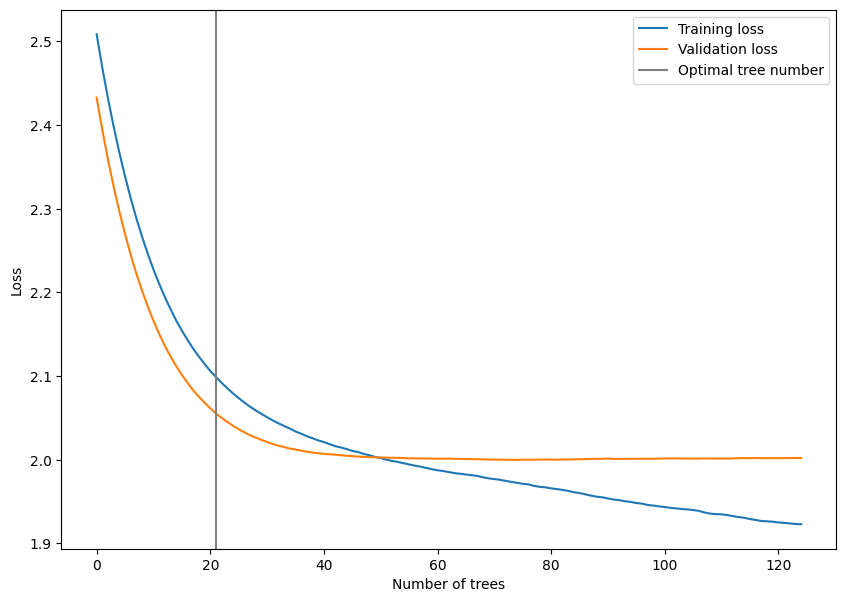

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# X_xgb_train = train_data[['02_assists','02_bonus','005_bonus','02_bps','005_bps','past_year_bps','02_clean_sheets','005_clean_sheets','past_year_clean_sheets','02_creativity','005_creativity',
#  'past_year_creativity','02_goals_conceded','005_goals_conceded','past_year_goals_conceded','02_goals_scored','02_ict_index','005_ict_index','past_year_ict_index','02_influence','005_influence',
#  '02_minutes','005_minutes','past_year_minutes','02_selected','005_selected','past_year_selected','02_team_a_score','005_team_a_score','past_year_team_a_score',
#  '02_team_h_score','005_team_h_score','past_year_team_h_score','02_threat','005_threat','past_year_threat','02_total_points','005_total_points','past_year_total_points',
#  '02_yellow_cards','005_yellow_cards']]
# X_xgb_test = test_data[['02_assists','02_bonus','005_bonus','02_bps','005_bps','past_year_bps','02_clean_sheets','005_clean_sheets','past_year_clean_sheets','02_creativity','005_creativity',
#  'past_year_creativity','02_goals_conceded','005_goals_conceded','past_year_goals_conceded','02_goals_scored','02_ict_index','005_ict_index','past_year_ict_index','02_influence','005_influence',
#  '02_minutes','005_minutes','past_year_minutes','02_selected','005_selected','past_year_selected','02_team_a_score','005_team_a_score','past_year_team_a_score',
#  '02_team_h_score','005_team_h_score','past_year_team_h_score','02_threat','005_threat','past_year_threat','02_total_points','005_total_points','past_year_total_points',
#  '02_yellow_cards','005_yellow_cards']]

X_xgb_train = train_data
#X_xgb_test = test_data_fwd

X_train,X_test,y_train,y_test = train_test_split(X_xgb_train,train_gt,test_size=0.2,random_state=42)

xgbr = xgb.XGBRegressor(n_estimators=10000, learning_rate=0.05, max_depth=6, min_child_weight=1,
                        gamma=0, subsample=1, colsample_bytree=1, objective='reg:squarederror', n_jobs=-1, early_stopping_rounds=50)

xgbr.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_train, y_train),(X_test, y_test)], verbose=True)

pred_train = xgbr.predict(X_train)
pred_test = xgbr.predict(X_test)
train_mse = np.square(pred_train - y_train['total_points']).mean(axis=0)
test_mse = np.square(pred_test - y_test['total_points']).mean(axis=0)
print(train_mse, test_mse)

results = xgbr.evals_result()
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

pred_final = xgbr.predict(test_data)

In [6]:
X_test.columns

Index(['team_strength', 'opponent_strength', 'was_home', 'profile_assists',
       'profile_bonus', 'profile_bps', 'profile_clean_sheets',
       'profile_creativity', 'profile_goals_conceded', 'profile_goals_scored',
       'profile_ict_index', 'profile_influence', 'profile_minutes',
       'profile_own_goals', 'profile_penalties_missed',
       'profile_penalties_saved', 'profile_red_cards', 'profile_saves',
       'profile_selected', 'profile_threat', 'profile_total_points',
       'profile_yellow_cards', 'position_DEF', 'position_FWD', 'position_GK',
       'position_MID'],
      dtype='object')

In [7]:
test_data.columns

Index(['team_strength', 'opponent_strength', 'was_home', 'profile_assists',
       'profile_bonus', 'profile_bps', 'profile_clean_sheets',
       'profile_creativity', 'profile_goals_conceded', 'profile_goals_scored',
       'profile_ict_index', 'profile_influence', 'profile_minutes',
       'profile_own_goals', 'profile_penalties_missed',
       'profile_penalties_saved', 'profile_red_cards', 'profile_saves',
       'profile_selected', 'profile_team_a_score', 'profile_team_h_score',
       'profile_threat', 'profile_total_points', 'profile_yellow_cards',
       'position_DEF', 'position_FWD', 'position_GK', 'position_MID'],
      dtype='object')

In [138]:
lgb_train_data.columns

Index(['team_strength', 'opponent_strength', 'was_home', 'name', 'position',
       '02_assists', '005_assists', 'past_year_assists', '02_bonus',
       '005_bonus', 'past_year_bonus', '02_bps', '005_bps', 'past_year_bps',
       '02_clean_sheets', '005_clean_sheets', 'past_year_clean_sheets',
       '02_creativity', '005_creativity', 'past_year_creativity',
       '02_goals_conceded', '005_goals_conceded', 'past_year_goals_conceded',
       '02_goals_scored', '005_goals_scored', 'past_year_goals_scored',
       '02_ict_index', '005_ict_index', 'past_year_ict_index', '02_influence',
       '005_influence', 'past_year_influence', '02_minutes', '005_minutes',
       'past_year_minutes', '02_own_goals', '005_own_goals',
       'past_year_own_goals', '02_penalties_missed', '005_penalties_missed',
       'past_year_penalties_missed', '02_penalties_saved',
       '005_penalties_saved', 'past_year_penalties_saved', '02_red_cards',
       '005_red_cards', 'past_year_red_cards', '02_saves', '00

In [19]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

cat_feats = ['name','team','opponent_team_name','position']
labelencoder = LabelEncoder()

for col in cat_feats:
    lgb_train_data[col] = labelencoder.fit_transform(lgb_train_data[col])

for col in cat_feats:
    lgb_train_data[col] = lgb_train_data[col].astype('int')

lgb_train_gt = train_gt['total_points']
X_train_lgb,X_test_lgb,y_train,y_test = train_test_split(lgb_train_data,lgb_train_gt,test_size=0.2,random_state=42)

lgb_train = lgb.Dataset(X_train_lgb,label=y_train,categorical_feature=['name','team','opponent_team_name','position'])
lgb_test = lgb.Dataset(X_test_lgb,label=y_test,)

#mean_absolute_percentage_error

param = {'num_leaves':500,'max_depth':9,'min_data_in_leaf':10,'objective':'quantile'}
param['metric'] = ['mse','rmse','mape']
num_round = 1000
bst = lgb.train(param,lgb_train,num_round,valid_sets=[lgb_test],callbacks=[lgb.early_stopping(stopping_rounds=5)])

pred_test = bst.predict(X_test_lgb,num_iterations=bst.best_iteration)

KeyError: 'name'

In [6]:
y_test

,bonus,total_points
54474,0,0
24399,0,0
70745,0,0
40925,0,1
7223,0,2
...,...,...
38915,0,3
16142,0,1
35370,0,3
1565,0,0


In [21]:
pred_test

array([0.04353439, 0.34214672, 0.7518354 , ..., 1.4568021 , 0.22744343,
       0.3231161 ], dtype=float32)

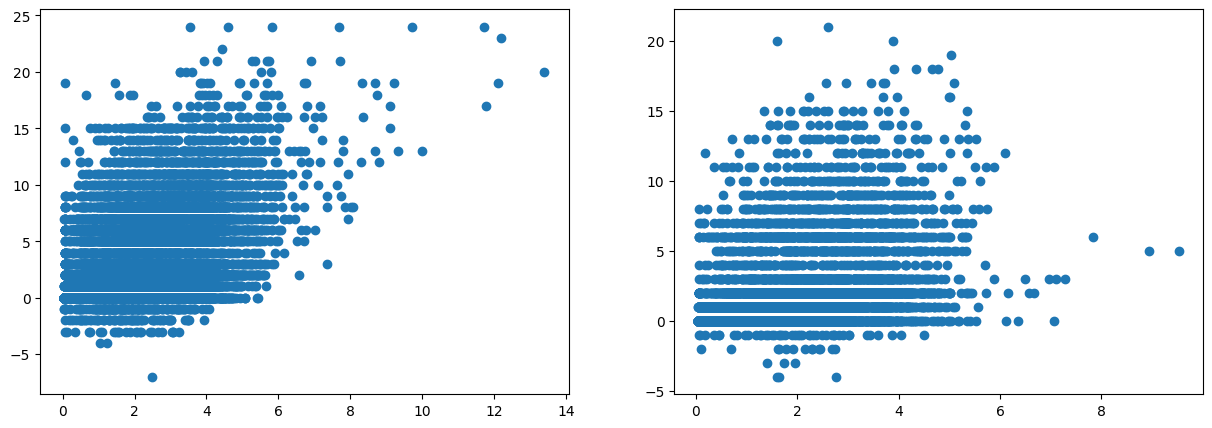

In [13]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,2,figsize=(15,5))
preds = pd.DataFrame(pred_test,columns = ['total_points'])
preds_t = pd.DataFrame(pred_train,columns = ['total_points'])
axs[0].scatter(preds_t['total_points'],y_train['total_points'])
axs[1].scatter(preds['total_points'],y_test['total_points'])

In [ ]:
import xgboost as xgb
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold
import numpy as np
import pandas as pd
train_X = train_data[['02_assists','02_bonus','005_bonus','02_bps','005_bps','past_year_bps','02_clean_sheets','005_clean_sheets','past_year_clean_sheets','02_creativity','005_creativity',
 'past_year_creativity','02_goals_conceded','005_goals_conceded','past_year_goals_conceded','02_goals_scored','02_ict_index','005_ict_index','past_year_ict_index','02_influence','005_influence',
 '02_minutes','005_minutes','past_year_minutes','02_selected','005_selected','past_year_selected','02_team_a_score','005_team_a_score','past_year_team_a_score',
 '02_team_h_score','005_team_h_score','past_year_team_h_score','02_threat','005_threat','past_year_threat','02_total_points','005_total_points','past_year_total_points',
 '02_yellow_cards','005_yellow_cards']]
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.01, 0.1]  # Regularization parameter (L1)
}

# Create the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)

# Create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object with k-fold cross-validation
grid_search = HalvingGridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=2)

# Fit the grid search on your data
grid_search.fit(train_X, train_gt)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get detailed results of all runs
results_df = pd.DataFrame(grid_search.cv_results_)

# Save the results to a CSV file
#results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)


In [ ]:
y_train

,minutes,bonus,total_points
5792,0.000000,0,0
32058,1.000000,0,2
41006,1.000000,0,2
48218,0.000000,0,0
25018,0.000000,0,0
...,...,...,...
62570,0.055556,0,1
38158,0.000000,0,0
860,0.022222,0,1
15795,0.000000,0,0


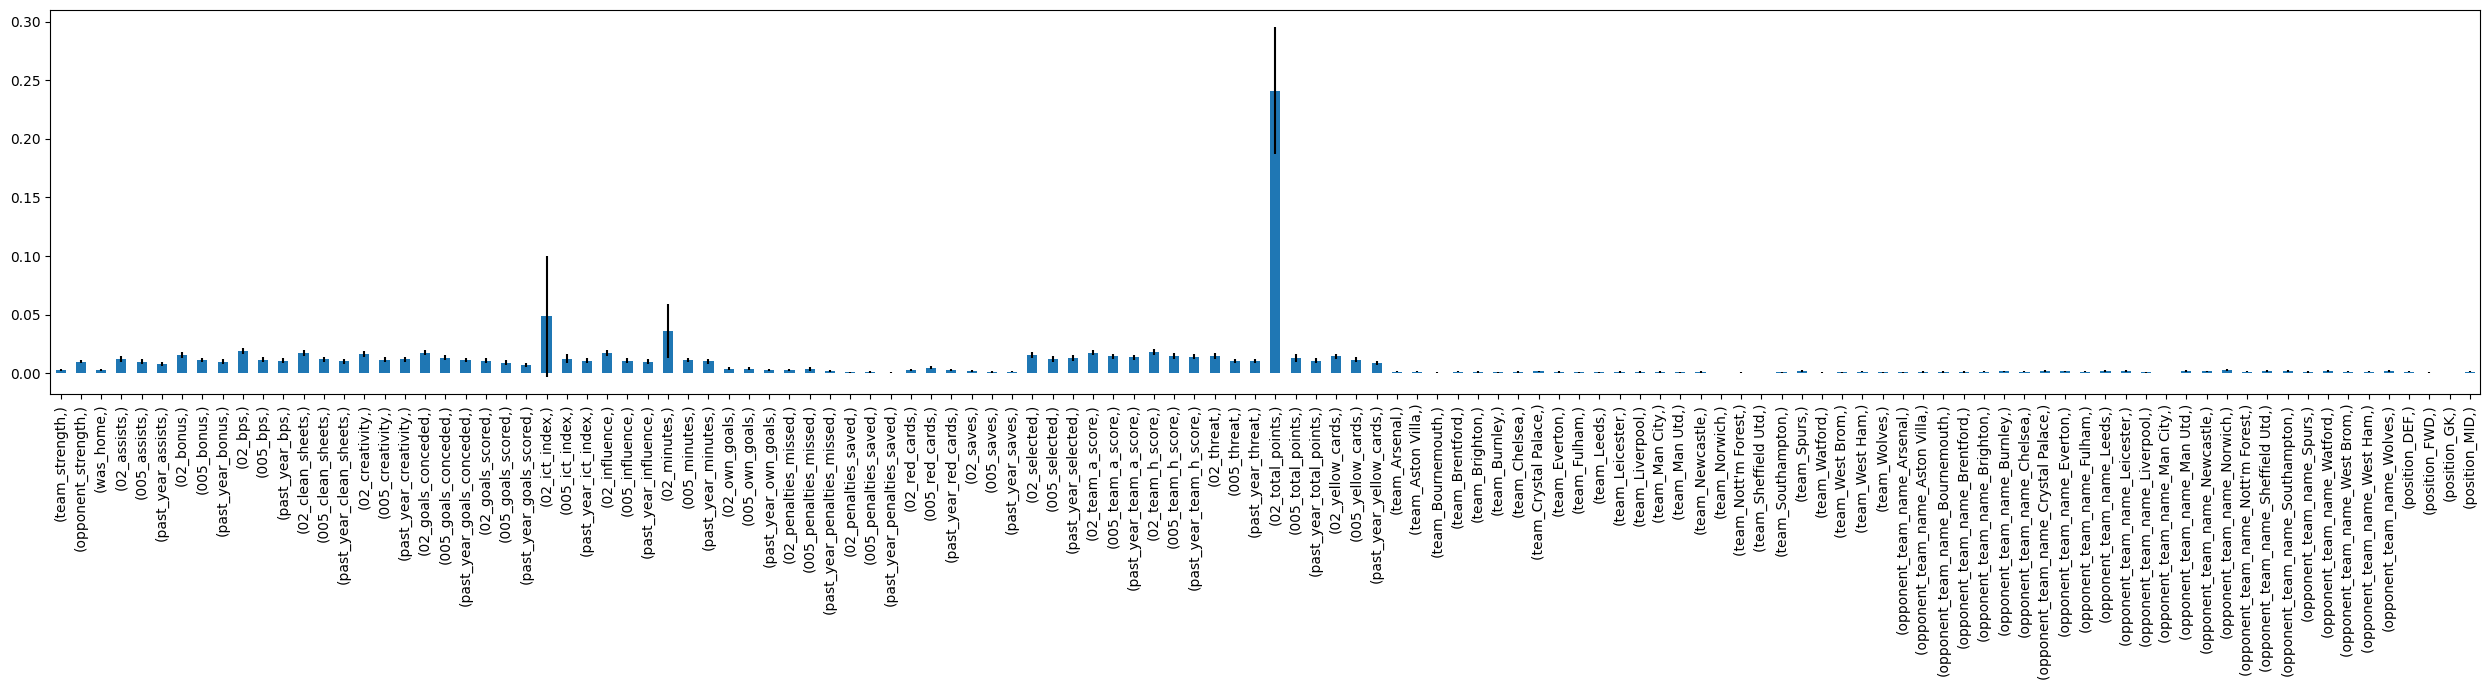

In [10]:
import matplotlib.pyplot as plt

importances = rfr.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfr.estimators_],axis=0)
forest_importances = pd.Series(importances,index=[X_train.columns])
fig,ax =plt.subplots(figsize=(25,7))
forest_importances.plot.bar(yerr=std,ax=ax)
fig.tight_layout()

In [23]:
features = [i[0] for i in forest_importances[forest_importances.values>=0.01].keys()]
features

['02_assists',
 '02_bonus',
 '005_bonus',
 '02_bps',
 '005_bps',
 'past_year_bps',
 '02_clean_sheets',
 '005_clean_sheets',
 'past_year_clean_sheets',
 '02_creativity',
 '005_creativity',
 'past_year_creativity',
 '02_goals_conceded',
 '005_goals_conceded',
 'past_year_goals_conceded',
 '02_goals_scored',
 '02_ict_index',
 '005_ict_index',
 'past_year_ict_index',
 '02_influence',
 '005_influence',
 '02_minutes',
 '005_minutes',
 'past_year_minutes',
 '02_selected',
 '005_selected',
 'past_year_selected',
 '02_team_a_score',
 '005_team_a_score',
 'past_year_team_a_score',
 '02_team_h_score',
 '005_team_h_score',
 'past_year_team_h_score',
 '02_threat',
 '005_threat',
 'past_year_threat',
 '02_total_points',
 '005_total_points',
 'past_year_total_points',
 '02_yellow_cards',
 '005_yellow_cards']

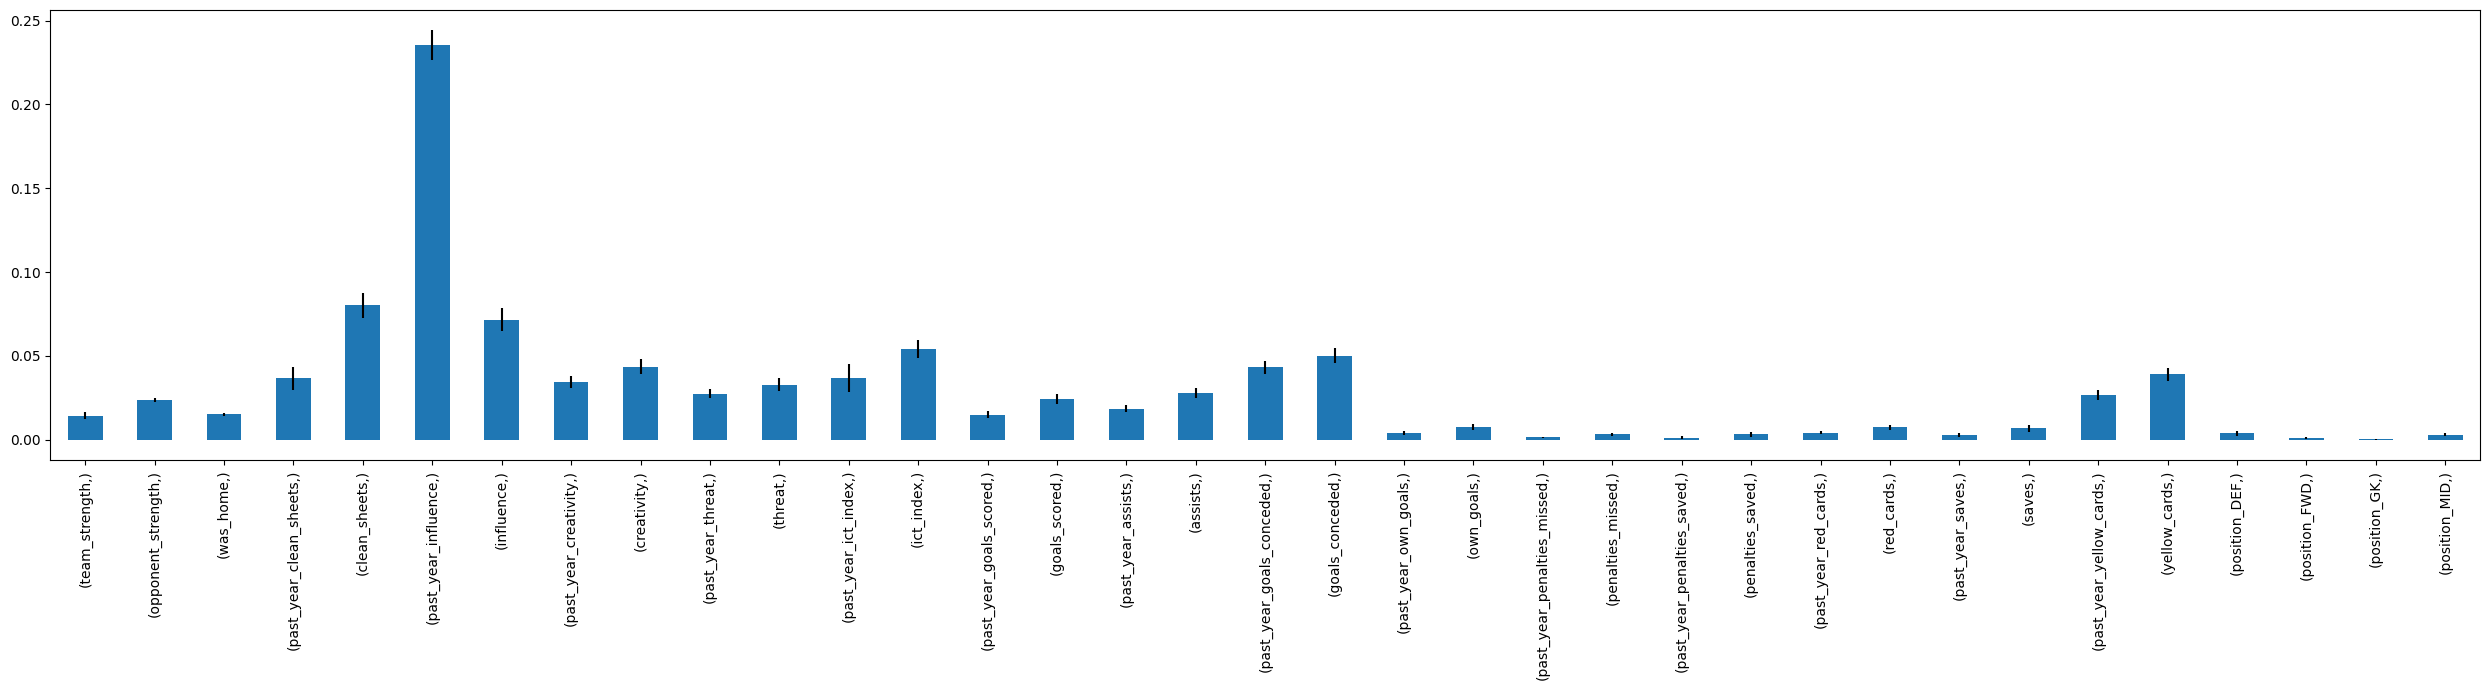

In [ ]:
import matplotlib.pyplot as plt

importances = rfr.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfr.estimators_],axis=0)
forest_importances = pd.Series(importances,index=[X_train.columns])
fig,ax =plt.subplots(figsize=(25,7))
forest_importances.plot.bar(yerr=std,ax=ax)
fig.tight_layout()

In [12]:
from sklearn.inspection import permutation_importance

fig,ax =plt.subplots(figsize=(25,7))

result = permutation_importance(rfr,X_test,y_test,n_repeats=10,random_state=42,n_jobs=-2)
forest_importances = pd.Series(result.importances_mean,index=[X_train.columns])
forest_importances.plot.bar(yerr=result.importances_std,ax=ax)
fig.tight_layout()
plt.show()

[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 140 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done 343 tasks      | elapsed:    2.5s
[Parallel(n_jobs=11)]: Done 626 tasks      | elapsed:    5.5s
[Parallel(n_jobs=11)]: Done 991 tasks      | elapsed:   17.6s
[Parallel(n_jobs=11)]: Done 1436 tasks      | elapsed:   36.3s
[Parallel(n_jobs=11)]: Done 1963 tasks      | elapsed:   52.9s
[Parallel(n_jobs=11)]: Done 2000 out of 2000 | elapsed:   54.3s finished


In [28]:
pd.DataFrame(pred_test)

,0
0,0.043534
1,0.342147
2,0.751835
3,0.068167
4,1.735558
...,...
15455,2.704644
15456,3.758806
15457,1.456802
15458,0.227443


In [42]:
y_test

47576    3
28961    1
10595    8
29898    0
474      2
        ..
56998    1
7671     0
54301    0
62990    0
22294    0
Name: total_points, Length: 12840, dtype: int64

In [20]:
test_output = xgbr.predict(test_data)

In [21]:
test_output_df = pd.DataFrame(test_output,columns=['total_points'])

In [59]:
test_output_df['minutes']*=90

(array([1.6864e+04, 5.6950e+03, 3.0060e+03, 6.3500e+02, 7.1000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.0465156 ,  1.38239753,  2.71827936,  4.05416107,  5.39004326,
         6.72592497,  8.06180668,  9.39768887, 10.73357105, 12.06945229,
        13.40533447]),
 <BarContainer object of 10 artists>)

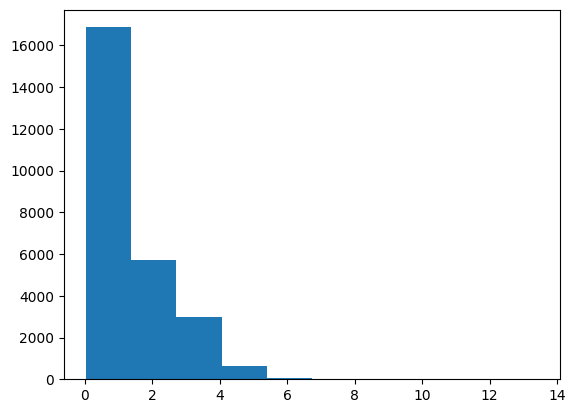

In [22]:
import matplotlib.pyplot as plt
plt.hist(test_output_df['total_points'])

In [18]:
player_costs = pd.read_csv(r'C:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\data\raw\2023-24\cleaned_players.csv')
player_costs['name'] = player_costs['first_name'] + ' ' + player_costs['second_name']
costs = player_costs[['name','now_cost']]

In [23]:
import pandas as pd
final_preds = test_input_metadata.copy()
final_preds['pred'] = test_output
final_preds = final_preds.merge(costs,on='name')

In [24]:
final_preds

,GW,season,kickoff_time,team,team_id,opponent_team_name,opponent_team_id,position,name,pred,now_cost
0,2,2023-24,2023-08-19 14:00:00+00:00,Brighton,5,Wolves,20,FWD,Aaron Connolly,0.060937,45
1,3,2023-24,2023-08-26 16:30:00+00:00,Brighton,5,West Ham,19,FWD,Aaron Connolly,0.060937,45
2,4,2023-24,2023-09-02 16:30:00+00:00,Brighton,5,Newcastle,15,FWD,Aaron Connolly,0.059914,45
3,5,2023-24,2023-09-16 14:00:00+00:00,Brighton,5,Man Utd,14,FWD,Aaron Connolly,0.059914,45
4,6,2023-24,2023-09-24 13:00:00+00:00,Brighton,5,Bournemouth,3,FWD,Aaron Connolly,0.060937,45
...,...,...,...,...,...,...,...,...,...,...,...
26267,34,2023-24,2024-04-20 14:00:00+00:00,Chelsea,7,Brighton,5,MID,Ângelo Gabriel Borges Damaceno,0.060937,50
26268,35,2023-24,2024-04-27 14:00:00+00:00,Chelsea,7,Aston Villa,2,MID,Ângelo Gabriel Borges Damaceno,0.060937,50
26269,36,2023-24,2024-05-04 14:00:00+00:00,Chelsea,7,West Ham,19,MID,Ângelo Gabriel Borges Damaceno,0.060937,50
26270,37,2023-24,2024-05-11 14:00:00+00:00,Chelsea,7,Nott'm Forest,16,MID,Ângelo Gabriel Borges Damaceno,0.060937,50


Index(['team_strength', 'opponent_strength', 'was_home', '02_assists',
       '005_assists', 'past_year_assists', '02_bonus', '005_bonus',
       'past_year_bonus', '02_bps',
       ...
       'opponent_team_name_Newcastle', 'opponent_team_name_Nott'm Forest',
       'opponent_team_name_Sheffield Utd', 'opponent_team_name_Spurs',
       'opponent_team_name_West Ham', 'opponent_team_name_Wolves',
       'position_DEF', 'position_FWD', 'position_GK', 'position_MID'],
      dtype='object', length=118)

In [98]:
final_preds[(final_preds['GW']==3) & (final_preds['pred']>5)][['name','position','pred','now_cost']]

,name,position,pred,now_cost
3500,Bruno Borges Fernandes,MID,6.506961,85
3684,Bukayo Saka,MID,6.690740,87
10995,James Maddison,MID,5.674425,76
11473,Jarrod Bowen,MID,5.165686,70
16542,Marcus Rashford,MID,5.601548,90
16837,Martin Ødegaard,MID,5.045386,85
17534,Matty Cash,DEF,6.249226,45
18308,Moussa Diaby,MID,7.547987,66
18859,Nicolas Jackson,FWD,5.697238,71
19780,Pascal Groß,MID,6.915334,64


In [39]:
grouped_preds = final_preds[final_preds['GW'].between(2,4)].groupby(['name','team','position','now_cost'],as_index=False)[['pred']].sum()

In [41]:
grouped_preds['efficiency'] = grouped_preds['pred']/grouped_preds['now_cost']
grouped_preds.sort_values(by='efficiency')

,name,team,position,now_cost,pred,efficiency
132,Christopher Nkunku,Chelsea,FWD,73,2.325269,0.031853
597,Romelu Lukaku Bolingoli,Chelsea,FWD,68,2.314294,0.034034
279,Iliman Ndiaye,Sheffield Utd,FWD,55,2.239770,0.040723
52,Anssumane Fati Vieira,Brighton,MID,65,2.676554,0.041178
18,Alejo Véliz,Spurs,FWD,54,2.242809,0.041533
...,...,...,...,...,...,...
46,André Onana,Man Utd,GK,50,137.657227,2.753145
470,Mark Flekken,Brentford,GK,45,124.567474,2.768166
493,Matty Cash,Aston Villa,DEF,46,129.351212,2.811983
490,Matt Turner,Nott'm Forest,GK,40,114.639587,2.865990


In [38]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMaximize

# Load the dataframe
df = grouped_preds  # Replace with your actual dataframe

# Create a PuLP problem
prob = LpProblem("FantasyFootballOptimization", LpMaximize)

# Decision variables
players = df['name'].unique()
player_vars = LpVariable.dicts("Player", players, cat='Binary')

# Objective function: maximize the sum of 'pred'
prob += lpSum(df.loc[df['name'] == player]['pred'] * player_vars[player] for player in players)

# Constraints
# Total number of players
prob += lpSum(player_vars[player] for player in players) == 15

# Maximum number of players per position
max_gk = 2
max_fwd = 3
max_def = 5
max_mid = 5
prob += lpSum(player_vars[player] for player in players if df.loc[df['name'] == player]['position'].values[0] == 'GK') <= max_gk
prob += lpSum(player_vars[player] for player in players if df.loc[df['name'] == player]['position'].values[0] == 'FWD') <= max_fwd
prob += lpSum(player_vars[player] for player in players if df.loc[df['name'] == player]['position'].values[0] == 'DEF') <= max_def
prob += lpSum(player_vars[player] for player in players if df.loc[df['name'] == player]['position'].values[0] == 'MID') <= max_mid

prob += lpSum(df.loc[df['name'] == player]['now_cost'] * player_vars[player] for player in players) <= 992
# Maximum 3 players from each team
teams = df['team'].unique()
max_players_per_team = 3
for team in teams:
    prob += lpSum(player_vars[player] for player in players if df.loc[df['name'] == player]['team'].values[0] == team) <= max_players_per_team

# Solve the optimization problem
prob.solve()

# Print the results
selected_players = [player for player in players if player_vars[player].value() == 1]
print("Selected Players:")
for player in selected_players:
    print(player)

df[df['name'].isin(selected_players)]


Selected Players:
Alisson Ramses Becker
Bruno Borges Fernandes
Bukayo Saka
Cristian Romero
Erling Haaland
Ethan Pinnock
Guglielmo Vicario
James Maddison
Joachim Andersen
Kyle Walker
Pascal Groß
Pervis Estupiñán
Rodrigo Hernandez
Taiwo Awoniyi
Yoane Wissa


,name,team,position,now_cost,pred
30,Alisson Ramses Becker,Liverpool,GK,55,11.357708
99,Bruno Borges Fernandes,Man Utd,MID,84,13.850613
104,Bukayo Saka,Arsenal,MID,87,15.591000
140,Cristian Romero,Spurs,DEF,47,10.544147
211,Erling Haaland,Man City,FWD,141,23.696896
215,Ethan Pinnock,Brentford,DEF,45,9.743300
251,Guglielmo Vicario,Spurs,GK,51,12.543467
311,James Maddison,Spurs,MID,78,13.820120
339,Joachim Andersen,Crystal Palace,DEF,46,9.960121
414,Kyle Walker,Man City,DEF,52,11.626541


In [91]:
gw = 4
final_preds[(final_preds['GW']==gw) & (final_preds['name'].isin(selected_players))][['name','now_cost','pred']]

,name,now_cost,pred
1217,Alphonse Areola,40,4.427720
3685,Bukayo Saka,87,5.584740
6108,Destiny Udogie,46,4.116936
7319,Enzo Fernández,50,5.199636
7430,Erling Haaland,140,8.014242
11474,Jarrod Bowen,70,5.409222
12802,Jordan Ayew,55,4.532216
12948,Jordan Pickford,45,5.805831
13607,Julián Álvarez,66,4.986477
14412,Kieran Trippier,65,4.832425


In [67]:
final_preds.to_csv(r'C:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\final_xgb_preds.csv')

In [39]:
optimised_teams = []
opt_df = final_preds.sort_values(by='GW')
opt_df['pred_score'] = (opt_df['bonus']+opt_df['total_points']*opt_df['minutes']/90)
opt_df = opt_df[['GW','name','team','position','now_cost','pred_score']]
opt_df = opt_df[~opt_df['name'].isin(['Daniel Jebbison','Michael Olise','Dwight McNeil'])]
opt_df = opt_df.groupby(by=['GW','name','team','position','now_cost'],group_keys=False).sum().reset_index()
game_weeks = opt_df['GW'].unique()
players = opt_df['name'].unique()
positions = dict(zip(opt_df['name'],opt_df['position']))
now_costs = dict(zip(opt_df['name'],opt_df['now_cost']))
pred_scores = {}
for gw in game_weeks:
    for player in players:
        pred_score = player,opt_df[(opt_df['GW'] == gw) & (opt_df['name'] == player)]['pred_score'].values
        if len(pred_score[1])==1:
            pred_scores[gw,player] = pred_score[1][0]
        else:
            pred_scores[gw,player] = 0

In [ ]:
from pulp import LpVariable, LpBinary, LpProblem, LpMaximize, lpSum, LpStatus, lpDot

player_allocations = LpVariable.dicts("Players", [(gw, player) for gw in game_weeks for player in players], lowBound=0, upBound=1, cat='Binary')


prob = LpProblem("FantasyFootballOptimization", LpMaximize)

for gw in game_weeks:
    prob+= lpSum((player_allocations[(gw, player)] *
        pred_scores[gw,player] for player in players)
    )

#prob+= lpSum((player_allocations[(gw, player)] - (1-bench_boost_gw[gw]) * bench_allocations[(gw, player)] + (1 + captain_boost_gw[gw]) * captain_allocations[(gw, player)]) *
#    (player_data[(player_data['GW'] == gw) & (player_data['name'] == player)]['pred_score'].values[0])
#    for gw in game_weeks for player in players
#)


for gw in game_weeks:
    prob += lpSum(player_allocations[(gw, player)] for player in players) == 15
    prob += lpDot((player_allocations[(gw, player)] for player in players), (bench_allocations[(gw, player)] for player in players)) == 4
    prob += lpDot((player_allocations[(gw, player)] for player in players), (captain_allocations[(gw, player)] for player in players)) == 1


    position_limits = {"GK": 2, "DEF": 5, "MID": 5, "FWD": 3}
    bench_limits = {"GK": 1, "DEF": 1, "MID": 1, "FWD": 1}

    for position, count in position_limits.items():
        prob += lpSum(player_allocations[(gw, player)] for player in players if positions[player] == position) == count
    for position, count in bench_limits.items():
        prob += lpSum(bench_allocations[(gw, player)] for player in players if positions[player] == position) == count
    
   # for p in players:

for i, gw in enumerate(game_weeks[:-1]):
    prob += lpDot((player_allocations[(gw, player)] for player in players),(player_allocations[(game_weeks[i+1], player)] for player in players)) <= 15
    prob += lpDot((player_allocations[(gw, player)] for player in players),(player_allocations[(game_weeks[i+1], player)] for player in players)) >= 14 * (1-free_hit_boosts_gw[game_weeks[i+1]])

prob += lpSum(players[i] * opt_df.loc[i, "pred_score"] for i in opt_df.index)
prob += lpSum(players[i] * opt_df.loc[i, "now_cost"] for i in opt_df.index) <= 1000



clubs = opt_df["team"].unique()
max_players_per_club = 3
for club in clubs:
    prob += lpSum(players[i] for i in opt_df.index if opt_df.loc[i, "team"] == club) <= max_players_per_club
prob.solve()

# Print the status of the solution
print("Status:", LpStatus[prob.status])

selected_players = [i for i in opt_df.index if players[i].varValue == 1]
selected_team = opt_df.loc[selected_players]
selected_team['GW'] = i+1
optimised_teams.append(selected_team)

all_weeks_df = pd.concat(optimised_teams)

c:\Users\charles.fletcher\Documents\Repos\fpl\fpl-predictor\fpl-venv\Lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


TypeError: Non-constant expressions cannot be multiplied

In [ ]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Set of game weeks and players
model.game_weeks = Set(initialize=game_weeks)
model.players = Set(initialize=players)

# Decision variables
model.player_allocations = Var(model.game_weeks, model.players, within=Binary)
model.captain_allocations = Var(model.game_weeks, model.players, within=Binary)
model.bench_allocations = Var(model.game_weeks, model.players, within=Binary)
model.captain_boost_gw = Var(model.game_weeks, within=Binary)
model.bench_boost_gw = Var(model.game_weeks, within=Binary)
model.free_hit_boosts_gw = Var(model.game_weeks, within=Binary)

# Objective
model.obj = Objective(
    expr=sum(
        ((model.player_allocations[gw, player] - (1-model.bench_boost_gw[gw]) 
            * model.bench_allocations[gw, player] + (1 + model.captain_boost_gw[gw]) * model.captain_allocations[gw, player]) * 
        pred_scores[gw, player]) for gw in model.game_weeks for player in model.players
    ),
    sense=maximize
)

# Constraints
model.constraints = ConstraintList()

model.constraints.add(sum(model.captain_boost_gw[gw] for gw in model.game_weeks) == 1)
model.constraints.add(sum(model.free_hit_boosts_gw[gw] for gw in model.game_weeks) == 1)
model.constraints.add(sum(model.bench_boost_gw[gw] for gw in model.game_weeks) == 1)
for gw in model.game_weeks:
    model.constraints.add(
        sum(model.player_allocations[gw, player] for player in model.players) == 15
    )
    model.constraints.add(
        sum(model.bench_allocations[gw, player] for player in model.players) == 4
    )
    model.constraints.add(
        sum(model.captain_allocations[gw, player] for player in model.players) == 1
    )

    model.constraints.add(
        sum(model.player_allocations[gw,player] * now_costs[player] for player in model.players) <= 1000
    )
    
    position_limits = {"GK": 2, "DEF": 5, "MID": 5, "FWD": 3}

    for position, count in position_limits.items():
        model.constraints.add(
            sum(model.player_allocations[gw, player] for player in model.players if positions[player] == position) == count
        )
    
    bench_limits = {"GK": 1, "DEF": 1, "MID": 1, "FWD": 1}

    for position, count in bench_limits.items():
        model.constraints.add(
            sum(model.bench_allocations[gw, player] for player in model.players if positions[player] == position) == count
        )
for i, gw in enumerate(game_weeks[:-1]):
    model.constraints.add(
        sum(model.player_allocations[gw, player] * model.player_allocations[model.game_weeks[i+1], player] for player in model.players) <= 15
    )
    model.constraints.add(
        sum(model.player_allocations[gw, player] * model.player_allocations[model.game_weeks[i+1], player] for player in model.players) >= 14 * (1 - model.free_hit_boosts_gw[game_weeks[i+1]])
    )
    
   

# Solve the model
solver = SolverFactory('glpk')
results = solver.solve(model)

# Print results
if results.solver.status == SolverStatus.ok and results.solver.termination_condition == TerminationCondition.optimal:
    print("Optimization successful!")
else:
    print("Optimization failed.")

# ... (retrieve and analyze results)


NameError: name 'game_weeks' is not defined

In [31]:
pred_test

array([[0.8784554 , 0.49177003, 3.960023  ],
       [0.79303694, 0.26969996, 3.1817825 ],
       [0.9516573 , 0.25953528, 3.8675559 ],
       ...,
       [0.95817244, 0.2558525 , 3.2312324 ],
       [0.01272288, 0.02086476, 0.09065932],
       [0.87644947, 0.27603814, 3.2334476 ]], dtype=float32)